In [1]:
!pip install word2number

Defaulting to user installation because normal site-packages is not writeable


In [2]:
%pip install word2number

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from word2number import w2n


In [4]:
df=pd.read_csv("hiring.csv")

In [5]:
df.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [6]:
df.shape

(8, 4)

In [7]:
df.isnull().sum()

experience                    2
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64

In [8]:
#Rename the columns
#Rename the column name test_score(out of 10)

df.rename(columns={'test_score(out of 10)': 'test_score'}, inplace=True)
df.rename(columns={'salary($)': 'salary'}, inplace=True)


In [9]:
df

,experience,test_score,interview_score(out of 10),salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


handling missing values

In [10]:
#Imputing experience using zero means no experience

df.experience=df.experience.fillna('zero')

#Converting categorical values to numerical values

df.experience=df.experience.apply(w2n.word_to_num)



In [11]:
df

,experience,test_score,interview_score(out of 10),salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [12]:

#Imputing test_score using mean

df.test_score=df.test_score.fillna(df.test_score.median())
df

,experience,test_score,interview_score(out of 10),salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [13]:
#Building the regression model

X=df.drop('salary',axis='columns')
y=df.salary

model=linear_model.LinearRegression()
model.fit(X,y)

LinearRegression()

In [14]:
#Finding the coefficients of the model
model.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [15]:
#Finding the intercept of the model

model.intercept_

17737.26346433771

The multivariate regression model

salary = 2812.95487627 *experience + 1845.70596798*test_score + 2205.24017467*interview_score(out of 10) + 17737.26346433771

Predicting the Salary of an individual apllicant with 5 years of experience , 6 test score marks and with 8 marks in Interview score

In [16]:
#Predicting the values

model.predict([[5,6,8]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([60518.19505095])

The predicted Salary of the applicant is 60518.19505095$

In [17]:
salary_pred=model.predict(X)

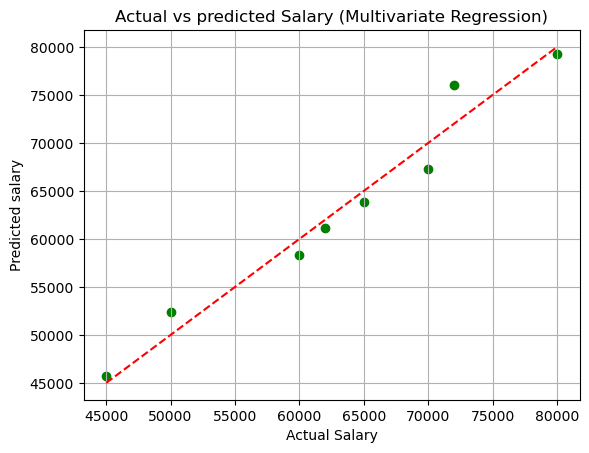

In [18]:
#Plotting the findings and actual values

plt.scatter(y,salary_pred,color='green')
plt.title('Actual vs predicted Salary (Multivariate Regression)')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # reference line
plt.xlabel('Actual Salary')
plt.ylabel('Predicted salary')
plt.grid(True)
plt.show()